In [87]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import layers
from pathlib import Path
import cv2
import numpy as np 
import pandas as pd
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

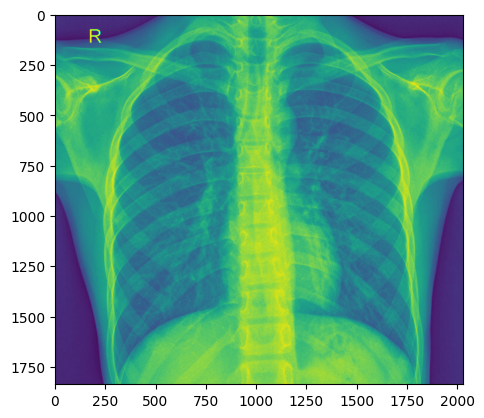

In [88]:
image = imread(r'E:\vsco_projects\practice\##Neurals\chest\chest_xray\test\NORMAL\IM-0005-0001.jpeg')
plt.imshow(image)
plt.show()

In [89]:
train_dataset_path = r'E:\vsco_projects\practice\##Neurals\chest\chest_xray\train'
test_dataset_path = r'E:\vsco_projects\practice\##Neurals\chest\chest_xray\test'
val_dataset_path = r'E:\vsco_projects\practice\##Neurals\chest\chest_xray\val'

batch_size = 32
img_height = 128
img_width = 128

train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dataset_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  val_dataset_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dataset_path,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [90]:
class_names = train_ds.class_names
class_names

['NORMAL', 'PNEUMONIA']

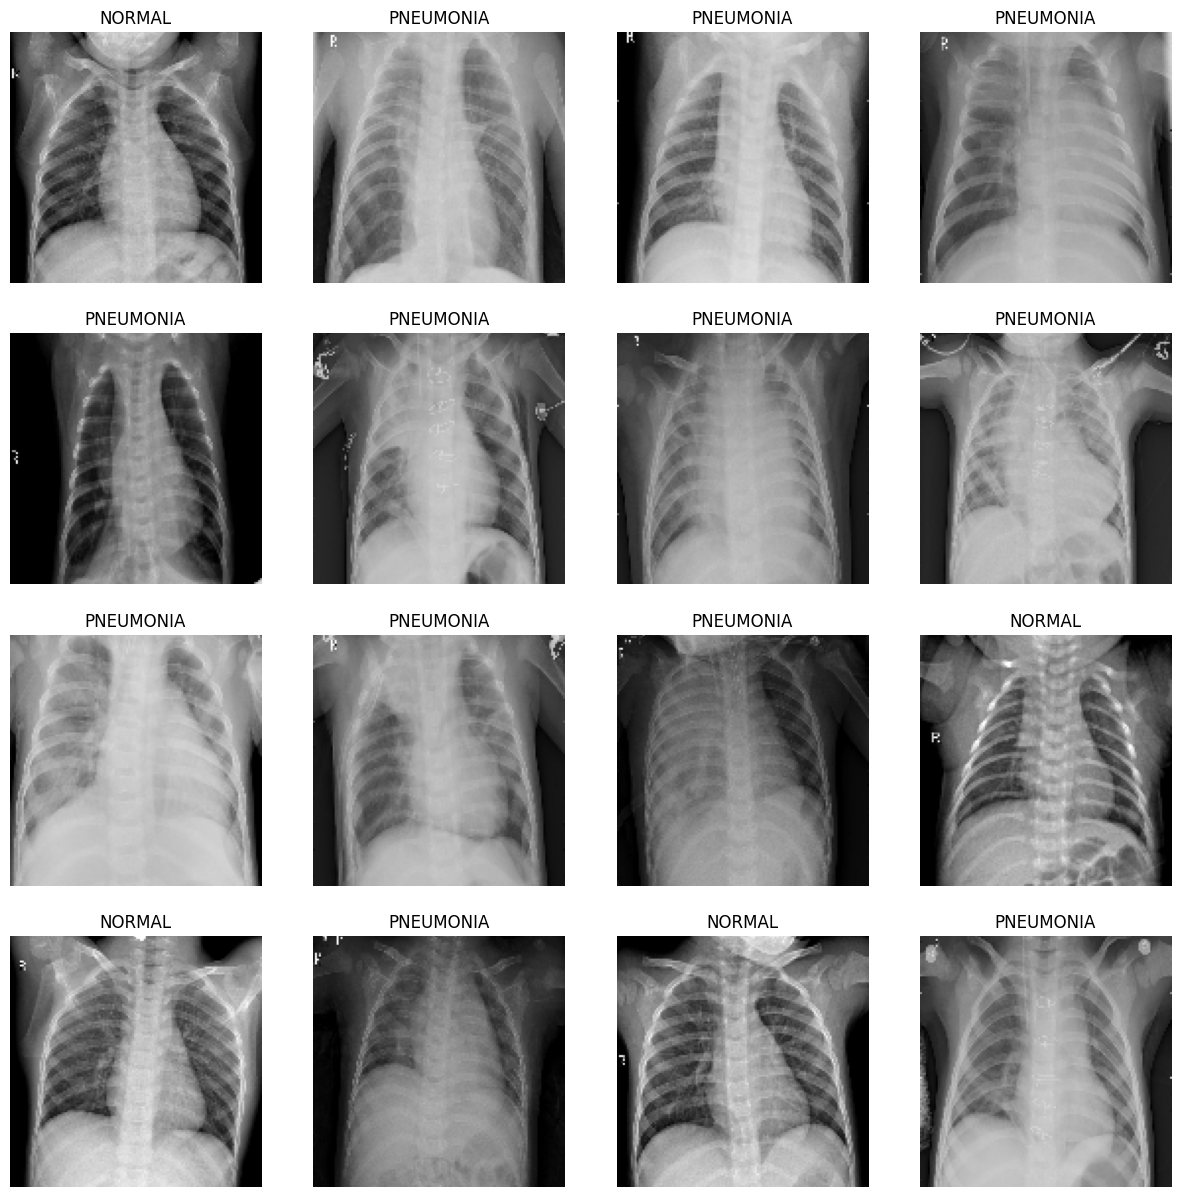

In [91]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [92]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [93]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)


In [94]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2)
])


In [95]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 128, 128, 3)       0         
                                                                 
 conv2d_32 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 64, 64, 16)        0         
 ng2D)                                                           
                                                                 
 rescaling_10 (Rescaling)    (None, 64, 64, 16)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                               

In [96]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [97]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25


163/163 [==============================] - 22s 76ms/step - loss: 0.3976 - accuracy: 0.8227 - val_loss: 0.7119 - val_accuracy: 0.6250
Epoch 2/25
163/163 [==============================] - 12s 76ms/step - loss: 0.2160 - accuracy: 0.9103 - val_loss: 0.5258 - val_accuracy: 0.8125
Epoch 3/25
163/163 [==============================] - 12s 76ms/step - loss: 0.1848 - accuracy: 0.9252 - val_loss: 0.8642 - val_accuracy: 0.6250
Epoch 4/25
163/163 [==============================] - 13s 77ms/step - loss: 0.1610 - accuracy: 0.9342 - val_loss: 0.5790 - val_accuracy: 0.7500
Epoch 5/25
163/163 [==============================] - 13s 77ms/step - loss: 0.1543 - accuracy: 0.9383 - val_loss: 0.6854 - val_accuracy: 0.6250
Epoch 6/25
163/163 [==============================] - 12s 77ms/step - loss: 0.1257 - accuracy: 0.9515 - val_loss: 0.8898 - val_accuracy: 0.6250
Epoch 7/25
163/163 [==============================] - 13s 77ms/step - loss: 0.1303 - accuracy: 0.9515 - val_loss: 0.8970 - val_accuracy: 0.6250
Epo

In [98]:
model.evaluate(test_ds)

20/20 [==============================] - 1s 42ms/step - loss: 0.5589 - accuracy: 0.8301


[0.5589020848274231, 0.8301281929016113]

In [100]:
from tensorflow.keras.models import save_model
model.save('final.h5')